<a href="https://colab.research.google.com/github/Donaldwic/Outstanding-Stock/blob/main/Policy_Impact_Score_for_Stock_price_after_election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Policy Impact Score (PIS)
The Policy Impact Score (PIS) is a quantitative metric designed to measure the sensitivity of a stock or sector's returns to government policy changes. By examining the statistical relationship between policy factors and stock returns, the PIS helps investors assess which assets may be most affected by regulatory, interest rate, and policy announcement changes. The PIS uses a multi-factor regression approach, isolating specific policy-related factors that drive returns in the market.

Multi-Factor Regression Model for Policy Impact
To calculate the Policy Impact Score, we define a regression model where returns are regressed on policy-related factors. Mathematically, this is expressed as:

$$𝑅_𝑡=𝛼+𝛽_1𝐹_{1,𝑡}+𝛽_2𝐹_{2,𝑡}+𝛽_3𝐹_{3,𝑡}+𝜖_𝑡$$

where:

* $𝑅_t$​ : Return of a stock or sector at time $𝑡$

* $𝛼$ : Intercept term, representing the baseline return unaffected by policy events.
* $𝛽_1,𝛽_2,𝛽_3$ : Coefficients that measure sensitivity to policy factors.

* $F_{1,t}​,F_{2,t}​,F_{3,t}$: Policy factors that can affect to stock price

* $𝜖_𝑡$​ : Error term, representing random variations in returns not explained by policy factors.


Each $β_i$​ coefficient provides insight into the stock’s or sector’s exposure to a specific type of policy. We estimate these coefficients through regression analysis on historical data, where policy factors are dummy variables or quantitative measures (e.g., using values of 0 or 1 depending on the presence of a policy event, or larger values if more significant events occur).

Calculating the Policy Impact Score (PIS)
The Policy Impact Score itself is constructed as a weighted sum of the absolute values of these sensitivity coefficients, denoting the aggregate impact of policy on returns:

$$PIS=𝑤_1∣𝛽_1∣+𝑤_2∣𝛽_2∣+𝑤_3∣𝛽_3∣$$

where:

* $𝑤_1,𝑤_2,𝑤_3$ : Weights assigned to each policy factor, representing the relative importance or prevalence of each factor in the sector.

* $∣𝛽_𝑖∣$ : Absolute value of each coefficient, representing the magnitude of impact without regard to direction.
The weights $𝑤_𝑖$ are chosen based on either historical relevance or industry sensitivity to each policy type. By taking the absolute values of the $𝛽_𝑖$ terms, we focus on the intensity of the impact rather than its direction (positive or negative).

Interpretation and Use of the PIS
* High PIS: A higher PIS indicates that the stock or sector is highly sensitive to policy changes, suggesting a higher likelihood of significant returns (or risks) in response to new policies.
* Low PIS: A lower PIS suggests reduced sensitivity, meaning the stock or sector is relatively insulated from policy fluctuations.
Example Calculation
Assume that for a particular stock, we estimate the following coefficients and assign these weights:

$$𝛽_1=1.0,𝛽_2=−0.6,𝛽_3=1.5,𝑤_1=0.5,𝑤_2=0.2,𝑤_3=0.3$$

The Policy Impact Score would be calculated as follows:

$$PIS=0.5× ∣1.0∣+0.2× ∣−0.6∣+ 0.3×∣1.5∣=1.07$$

This score of $1.07$ quantifies the stock’s overall sensitivity to policy events. Higher scores indicate greater exposure, allowing investors to assess risks and opportunities arising from policy-related market shifts.



In [190]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Dictionary event about policies for each sector

In [191]:
Financial_Services = {
    "2008-10-03": "Emergency Economic Stabilization Act",
    "2009-02-17": "American Recovery and Reinvestment Act (banking support)",
    "2009-05-22": "Credit Card Accountability Responsibility and Disclosure Act",
    "2010-07-21": "Dodd-Frank Wall Street Reform and Consumer Protection Act",
    "2010-12-17": "Tax Relief, Unemployment Insurance Reauthorization, and Job Creation Act",
    "2011-08-02": "Budget Control Act",
    "2012-04-05": "JOBS Act",
    "2013-01-02": "American Taxpayer Relief Act",
    "2014-02-07": "Agricultural Act (Farm Bill, includes financial provisions)",
    "2015-10-30": "Bipartisan Budget Act of 2015",
    "2016-06-30": "Puerto Rico Oversight, Management, and Economic Stability Act (PROMESA)",
    "2016-12-13": "21st Century Cures Act (financial provisions for healthcare)",
    "2017-12-22": "Tax Cuts and Jobs Act",
    "2018-05-24": "Economic Growth, Regulatory Relief, and Consumer Protection Act",
    "2018-10-10": "Secure and Fair Enforcement (SAFE) Banking Act",
    "2019-12-20": "Further Consolidated Appropriations Act, 2020",
    "2020-01-29": "USMCA Implementation Act (financial provisions)",
    "2020-03-27": "CARES Act (financial relief for businesses)",
    "2020-12-27": "Consolidated Appropriations Act, 2021",
    "2021-03-11": "American Rescue Plan Act (financial assistance)",
    "2022-08-16": "Inflation Reduction Act (financial incentives for clean energy)",
    "2023-01-01": "No Surprises Act (financial protections in healthcare)",
    "2023-06-25": "Bipartisan Safer Communities Act (financial support for safety initiatives)",
    "2024-04-20": "Reforming Intelligence and Securing America Act",
    "2024-09-26": "Continuing Appropriations and Extensions Act, 2025",
}


In [192]:
Energy = {
    "2015-12-18": "Protecting Americans from Tax Hikes (PATH) Act (energy credits)",
    "2016-12-18": "Renewable Fuel Standard Program Amendments",
    "2017-01-24": "Executive Order on Expediting Energy Infrastructure Projects",
    "2018-03-23": "Omnibus Appropriations Bill (energy infrastructure funding)",
    "2018-10-23": "America’s Water Infrastructure Act",
    "2019-06-14": "Energy Act (renewable energy initiatives)",
    "2020-01-01": "Corporate Average Fuel Economy (CAFE) Standards Update",
    "2020-04-24": "Paycheck Protection Program and Health Care Enhancement Act",
    "2021-06-15": "Clean Energy for America Act",
    "2021-11-15": "Infrastructure Investment and Jobs Act (energy provisions)",
    "2022-08-16": "Inflation Reduction Act (renewable energy support)",
    "2023-02-14": "Domestic Energy Production Act",
    "2023-04-15": "National Petroleum Reserve Expansion Act",
    "2024-01-20": "Strategic Energy Storage Act",
    "2024-03-10": "Green Energy Incentives and Tax Credits Act",
    "2024-04-02": "Energy Efficiency Standards Act",
    "2024-05-10": "National Energy Security Act",
    "2024-06-21": "Energy Infrastructure Modernization Act",
    "2024-07-22": "Climate Resilience and Adaptation Act",
    "2024-08-15": "Renewable Energy Workforce Development Act",
    "2024-09-10": "Low-Carbon Transportation Act",
    "2024-09-26": "Energy Market Reform Act",
    "2024-10-05": "Offshore Wind Energy Development Act",
    "2024-10-15": "Artificial Intelligence Governance and Accountability Act (energy efficiency monitoring)",
}


In [193]:
Technology = {
    "2009-02-17": "American Recovery and Reinvestment Act (broadband and tech grants)",
    "2012-04-05": "JOBS Act (boosts tech startups)",
    "2014-01-17": "Presidential Directive on Cybersecurity Standards",
    "2015-07-29": "Digital Accountability and Transparency Act (DATA Act)",
    "2016-06-21": "Consumer Review Fairness Act",
    "2017-12-18": "Internet Freedom Order",
    "2018-10-10": "Secure and Trusted Communications Networks Act",
    "2020-01-29": "USMCA Implementation Act (digital trade provisions)",
    "2021-05-12": "Executive Order on Improving the Nation's Cybersecurity",
    "2021-11-15": "Infrastructure Investment and Jobs Act (broadband expansion)",
    "2022-08-16": "Inflation Reduction Act (tech for clean energy)",
    "2023-03-30": "Innovation and Competition Act",
    "2023-05-25": "Digital Trade and Data Act",
    "2023-08-12": "Tech Workforce Training Act",
    "2024-02-14": "Data Privacy and Protection Act",
    "2024-04-15": "Digital Infrastructure Protection Act",
    "2024-05-10": "National Cybersecurity Strategy Implementation Act",
    "2024-06-10": "Quantum Computing Initiative",
    "2024-07-12": "AI and Emerging Tech Development Act",
    "2024-08-01": "Innovation in Manufacturing Technology Act",
    "2024-09-01": "Secure IoT Devices Act",
    "2024-09-18": "Advanced Robotics Manufacturing Act",
    "2024-10-05": "Ethical AI Regulation Act",
    "2024-10-15": "Artificial Intelligence Governance and Accountability Act",
}


In [194]:
Healthcare = {
    "2010-03-23": "Affordable Care Act",
    "2013-10-01": "Medicare Access and CHIP Reauthorization Act",
    "2014-12-16": "Ukraine Freedom Support Act (healthcare aid provisions)",
    "2015-10-30": "Bipartisan Budget Act (healthcare provisions)",
    "2016-12-13": "21st Century Cures Act",
    "2017-05-05": "Consolidated Appropriations Act (includes healthcare funding)",
    "2018-02-09": "Bipartisan Budget Act (healthcare provisions)",
    "2019-10-01": "Medicare Prescription Drug Pricing Plan",
    "2020-03-27": "CARES Act (healthcare support)",
    "2020-12-27": "Consolidated Appropriations Act, 2021",
    "2021-03-11": "American Rescue Plan Act (healthcare support)",
    "2021-08-01": "Healthcare Workforce Development Act",
    "2022-03-15": "Consolidated Appropriations Act, 2022",
    "2022-08-16": "Inflation Reduction Act (prescription drug provisions)",
    "2023-01-01": "No Surprises Act",
    "2023-06-20": "Healthcare Innovation Act",
    "2023-09-01": "Telehealth Expansion Act",
    "2024-02-18": "Health Data Privacy Act",
    "2024-04-11": "Medicare for Rural Communities Act",
    "2024-05-10": "Healthcare Worker Protection Act",
    "2024-06-08": "Mental Health Services Access Act",
    "2024-07-01": "Affordable Medications Act",
    "2024-08-16": "Elder Care Improvement Act",
    "2024-09-20": "Rural Health Equity Act",
}


In [195]:
Industrials = {
    "2009-02-17": "American Recovery and Reinvestment Act (infrastructure spending)",
    "2010-07-21": "Dodd-Frank Act (manufacturing provisions)",
    "2012-07-06": "Moving Ahead for Progress in the 21st Century Act (MAP-21)",
    "2013-03-01": "Sequestration Implementation under the Budget Control Act",
    "2014-02-07": "Agricultural Act (Farm Bill, rural infrastructure)",
    "2014-12-16": "Ukraine Freedom Support Act (defense spending)",
    "2015-10-05": "Surface Transportation Extension Act",
    "2016-12-13": "21st Century Cures Act (infrastructure for healthcare facilities)",
    "2017-06-06": "Strengthening Career and Technical Education for the 21st Century Act",
    "2018-03-23": "Omnibus Appropriations Bill (manufacturing and infrastructure funding)",
    "2018-10-23": "America’s Water Infrastructure Act",
    "2019-01-14": "Department of Defense Appropriations Act (industrial provisions)",
    "2020-01-29": "USMCA Implementation Act (manufacturing impact)",
    "2020-03-27": "CARES Act (industrial sector support)",
    "2021-03-11": "American Rescue Plan Act (infrastructure spending)",
    "2021-11-15": "Infrastructure Investment and Jobs Act",
    "2022-05-10": "Advanced Manufacturing Act",
    "2022-08-16": "Inflation Reduction Act (industrial manufacturing support)",
    "2023-01-10": "Made in America Manufacturing Act",
    "2023-04-25": "Supply Chain Resilience Act",
    "2024-02-15": "Clean Manufacturing Expansion Act",
    "2024-05-01": "Infrastructure Resiliency Act",
    "2024-06-08": "American Manufacturing Competitiveness Act",
    "2024-07-22": "Climate Resilience and Adaptation Act (industrial infrastructure)",
    "2024-09-01": "Sustainable Infrastructure Development Act",
}


In [196]:
Consumer_Discretionary = {
    "2009-02-17": "American Recovery and Reinvestment Act (stimulus boosts consumer spending)",
    "2010-07-21": "Dodd-Frank Act (consumer protection provisions)",
    "2013-12-20": "Bipartisan Budget Act (consumer spending measures)",
    "2015-11-02": "Bipartisan Budget Act of 2015",
    "2017-12-22": "Tax Cuts and Jobs Act (disposable income increases)",
    "2018-06-20": "Tourism for All Act",
    "2018-10-24": "Opioid Crisis Response Act (support for addiction services)",
    "2020-03-27": "CARES Act (stimulus boosts consumer spending)",
    "2021-03-11": "American Rescue Plan Act (stimulus for consumer spending)",
    "2022-03-30": "Support for Local Restaurants Act",
    "2023-02-14": "Entertainment Industry Workforce Act",
    "2023-06-01": "Child and Family Tax Credit Expansion Act",
    "2023-08-01": "Recreation and Outdoors Act",
    "2023-09-12": "Retailer Support and Innovation Act",
    "2024-01-30": "Affordable Travel Act",
    "2024-03-18": "Consumer Product Safety Enhancement Act",
    "2024-05-05": "Creative Arts Funding and Support Act",
    "2024-06-15": "Affordable Housing and Rental Relief Act",
    "2024-07-01": "Holiday Retail Support Act",
    "2024-08-12": "Home Improvement Support Act",
    "2024-09-01": "Consumer Credit Protection Act Update",
    "2024-09-15": "Hospitality and Tourism Workforce Act",
    "2024-09-26": "Consumer Spending and Savings Act",
    "2024-10-05": "E-commerce Safety and Compliance Act",
}


In [197]:
Consumer_Staples = {
    "2014-02-07": "Agricultural Act (Farm Bill)",
    "2015-12-18": "Protecting Americans from Tax Hikes (PATH) Act (food and agriculture incentives)",
    "2016-07-01": "Food Safety Modernization Act Implementation",
    "2018-02-09": "Bipartisan Budget Act (food programs)",
    "2018-06-30": "USDA Organic Certification Standards Update",
    "2019-04-01": "Dairy and Livestock Industry Support Act",
    "2020-03-27": "CARES Act (essential services support)",
    "2021-03-11": "American Rescue Plan Act (food assistance provisions)",
    "2021-09-01": "Essential Goods Price Stabilization Act",
    "2022-08-16": "Inflation Reduction Act (food cost reductions)",
    "2023-03-15": "Food Security and Farm Development Act",
    "2023-06-01": "Nutrition and Health Education Act",
    "2023-08-10": "Consumer Protection in Food Safety Act",
    "2023-11-01": "Rural Access to Healthy Food Act",
    "2024-02-11": "Supplemental Nutrition Assistance Program Expansion",
    "2024-03-01": "Grocery Price Transparency Act",
    "2024-04-15": "Beverage Industry Workforce Act",
    "2024-06-15": "Rural Food Access and Equity Act",
    "2024-07-18": "Essential Commodities Act",
    "2024-08-01": "Household Goods Price Support Act",
    "2024-09-01": "Clean Food Labeling Act",
    "2024-09-15": "Consumer Food Safety Act",
    "2024-09-26": "Agricultural and Food Security Act",
    "2024-10-05": "Retail Food Standards Act",
}


In [198]:
Telecommunications = {
    "2009-02-17": "American Recovery and Reinvestment Act (broadband expansion)",
    "2012-02-22": "Spectrum Act (spectrum allocation for telecom)",
    "2014-06-02": "Rural Broadband Expansion Act",
    "2017-12-18": "Internet Freedom Order",
    "2018-10-10": "Secure and Trusted Communications Networks Act",
    "2019-01-01": "FCC Net Neutrality Repeal",
    "2020-01-29": "USMCA Implementation Act (digital trade provisions)",
    "2020-10-08": "Rural Digital Opportunity Fund",
    "2021-06-30": "Broadband Data Improvement Act",
    "2021-11-15": "Infrastructure Investment and Jobs Act (broadband funding)",
    "2022-05-20": "5G Network Development Act",
    "2022-08-16": "Inflation Reduction Act (telecommunications provisions)",
    "2023-01-15": "Internet Access and Digital Equity Act",
    "2023-04-05": "Digital Inclusion Act",
    "2023-07-12": "Next Generation Wireless Act",
    "2023-09-01": "Telecom Security Enhancement Act",
    "2024-02-14": "Data Privacy and Protection Act",
    "2024-04-15": "Broadband Accessibility Act",
    "2024-05-10": "National Cybersecurity Strategy Implementation Act",
    "2024-06-18": "Digital Infrastructure and Innovation Act",
    "2024-07-12": "Telecommunications Competition and Investment Act",
    "2024-08-01": "Rural Broadband Access Act",
    "2024-09-05": "NextGen Internet Expansion Act",
    "2024-09-26": "5G and Beyond Infrastructure Act",
    "2024-10-10": "Internet User Protection Act",
}


# Stock in DJI

In [199]:
# Define the stocks and their sectors for analysis (example list, please expand as needed)
stocks = {
    "JPM": "Financial_Services",
    "GS": "Financial_Services",
    "AXP": "Financial_Services",
    "TRV": "Financial_Services",
    "CVX": "Energy",
    "AAPL": "Technology",
    "MSFT": "Technology",
    "INTC": "Technology",
    "CSCO": "Technology",
    "IBM": "Technology",
    "JNJ": "Healthcare",
    "MRK": "Healthcare",
    "AMGN": "Healthcare",
    "UNH": "Healthcare",
    "BA": "Industrials",
    "CAT": "Industrials",
    "MMM": "Industrials",
    "HON": "Industrials",
    "MCD": "Consumer_Discretionary",
    "NKE": "Consumer_Discretionary",
    "HD": "Consumer_Discretionary",
    "DIS": "Consumer_Discretionary",
    "PG": "Consumer_Staples",
    "KO": "Consumer_Staples",
    "WMT": "Consumer_Staples",
    "VZ": "Telecommunications",
}

In [200]:
# Dictionary of dictionaries for each sector
# It has been bug when I called sector to be dictionary name
sector_dictionaries = {
    "Technology": Technology,
    "Healthcare": Healthcare,
    "Financial Services": Financial_Services,
    "Energy": Energy,
    "Industrials": Industrials,
    "Consumer Discretionary": Consumer_Discretionary,
    "Consumer Staples": Consumer_Staples,
    "Telecommunications": Telecommunications
}


# Main code

In [201]:
# Download historical data
data = {stock: yf.download(stock, start="2008-01-01", end="2024-11-01") for stock in stocks}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# Calculate policy scores

In [202]:
# Calculate Policy Impact Scores
policy_scores = {}
for ticker, sector in stocks.items():
    stock_data = data[ticker]
    stock_data["Return"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # Initialize list to collect event scores for this stock
    event_scores = []
    # We gonna count only major event for each sector and separately consider each sector.
    sector_dict = globals().get(sector)
    for event_date in sector_dict.keys():
        # event windows means the event approximately affect to stock price n days
        # Define event window: 5 days before, after, and now
        event_window_after = stock_data.loc[event_date:].head(5)["Return"]
        event_window_before= stock_data.loc[:event_date].tail(5)["Return"]
        event_window_now= stock_data.loc[event_date:event_date]["Return"]
        event_window= pd.concat([event_window_after, event_window_before,event_window_now])
        # Calculate normal return as average return 30 days before the event
        normal_window = stock_data.loc[:event_date].tail(30)["Return"]
        normal_return = normal_window.mean()

        # Calculate abnormal returns and sum absolute values
        abnormal_returns = event_window - normal_return
        #Assume that weighted factors (w) are the same of all time so, we can put abs to w(beta)
        event_sensitivity_score = np.sum(np.abs(abnormal_returns))
        event_scores.append(event_sensitivity_score)

    # Average sensitivity score across events
    policy_scores[ticker] = np.mean(event_scores)


In [203]:
# Convert to DataFrame for analysis
policy_df = pd.DataFrame.from_dict(policy_scores, orient="index", columns=["Policy Impact Score"])
policy_df["Sector"] = policy_df.index.map(stocks.get)

In [204]:
# Group by Sector and calculate average policy impact score for each sector
sector_impact = policy_df.groupby("Sector")["Policy Impact Score"].mean()
sector_impact = sector_impact.sort_values(ascending=False)

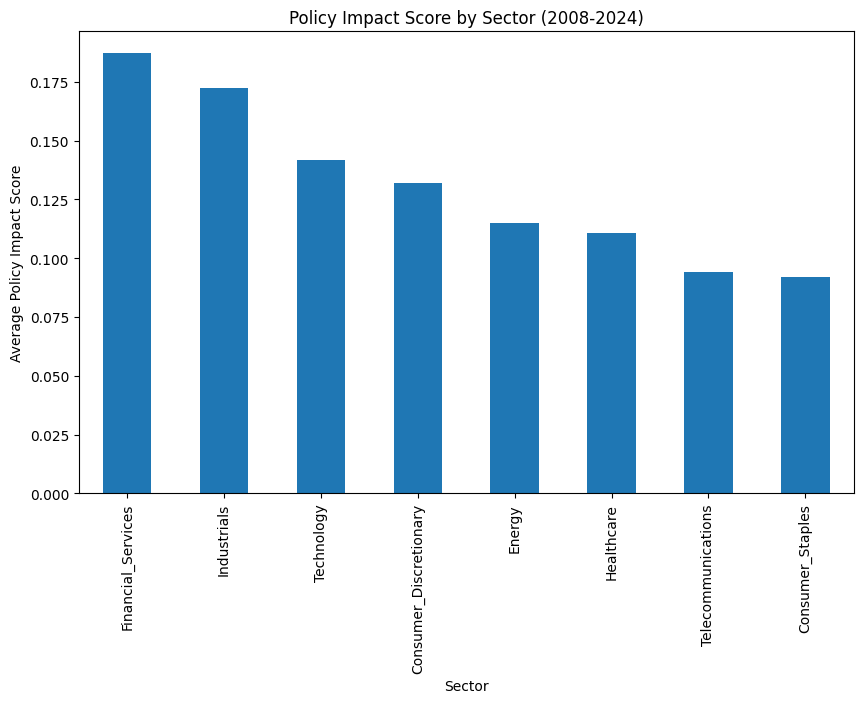

In [205]:
# Plot Sector Impact Scores
plt.figure(figsize=(10, 6))
sector_impact.plot(kind="bar")
plt.title("Policy Impact Score by Sector (2008-2024)")
plt.xlabel("Sector")
plt.ylabel("Average Policy Impact Score")
plt.show()